<a href="https://colab.research.google.com/github/azam6301732985/SMS-spam-detector999/blob/main/SMS_Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SMS Spam Detection Using 7 Machine Learning Algorithms and Simple Bag of Words**
*By :- Mohammad Abdul Azam*

**The following project will be divided into 4 steps, for clear understanding purpose**



*  Step-1 : Exploratory Data Analysis(EDA),Data Cleaning and Pre-processing
*  Step-2: Model Building
*  Step-3: Model Evaluation metrics
*  Step-4: Model Deployment





The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Content The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link]. -> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link]. -> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link]. -> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

Acknowledgements The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

Inspiration Can you use this dataset to build a prediction model that will accurately classify which texts are spam?

  # Step-1 : EDA(Exploratory Data Analysis),Data Cleaning and Pre-processing.

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spam (1).csv to spam (1).csv
User uploaded file "spam (1).csv" with length 503663 bytes


In [5]:
#importing the basic libraries
import numpy as np # for numeric calculation
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for visualization

In [6]:
#importing the data
df=pd.read_csv("spam (1).csv", encoding='latin-1')

In [7]:
#Eyeballing the data
#Let's take a look at the first few rows of the table just to see what's in there
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [8]:
#shape of the dataframe
df.shape # contains 5572 rows and 5 columns

(5572, 5)

In [9]:
#let's check if there are any null/missing values
df.isnull().sum()


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
#Let's drop the Unwanted columns, and rename the columns to something we can understand.
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns = {'v1':'label','v2':'message'})

In [11]:
#after droping the columns, let'c check how the dataframe looks like with label and message features
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#Let's drop the duplicate rows present in the dataset.

df.drop_duplicates(subset ="message", keep = False, inplace = True)

In [13]:
#lets check the shape if the datapoins have been reduced or not ?
df.shape   # previsously the datapoins was 5572

(4888, 2)

YESS!! That means we had a few duplicate data points, but now they are removed. We'll mapping 0 and 1 values for the labels.

In [14]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [15]:
#let's see the length of each message of the first 5 rows

df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148


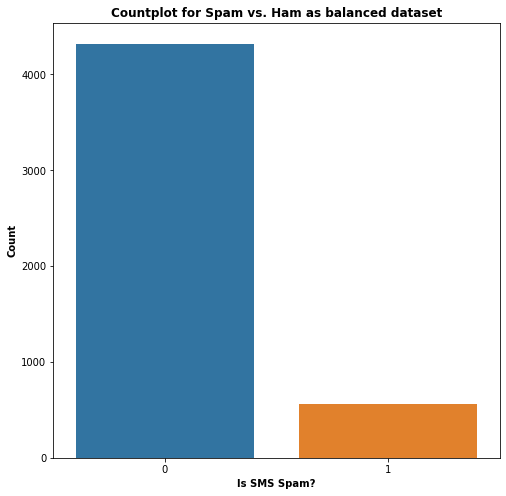

In [16]:
#Visualization

# Countplot for Spam vs. Ham as balanced dataset
import seaborn as sns # for visualization
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset', fontweight='bold')
p = plt.xlabel('Is SMS Spam?', fontweight='bold')
p = plt.ylabel('Count', fontweight='bold')

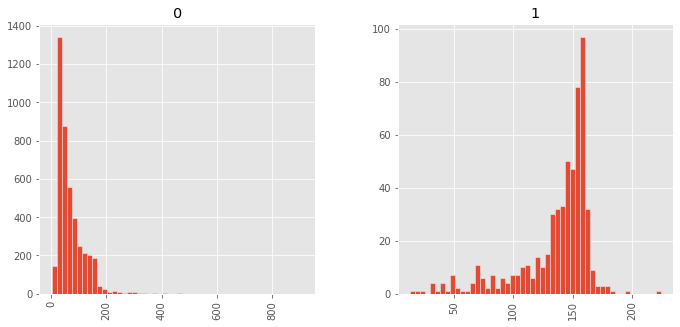

In [17]:
plt.rcParams['patch.force_edgecolor'] = True
plt.style.use('ggplot')
df.hist(column='length', by='label', bins=50, figsize=(11,5));

In [18]:
df.describe()

,label,length
count,4888.000000,4888.000000
mean,0.115794,77.338380
std,0.320010,56.812841
min,0.000000,3.000000
25%,0.000000,36.000000
50%,0.000000,59.000000
75%,0.000000,112.000000
max,1.000000,910.000000


In [19]:
# Now, let's do some basic statistical analysis of the attributes.
for i in df.columns:
  print("Basic Statistics for Feature: {0}".format(i))
  print(df[i].describe())
  print("==========================================")

Basic Statistics for Feature: label
count    4888.000000
mean        0.115794
std         0.320010
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label, dtype: float64
Basic Statistics for Feature: message
count                                                  4888
unique                                                 4888
top       Also that chat was awesome but don't make it r...
freq                                                      1
Name: message, dtype: object
Basic Statistics for Feature: length
count    4888.000000
mean       77.338380
std        56.812841
min         3.000000
25%        36.000000
50%        59.000000
75%       112.000000
max       910.000000
Name: length, dtype: float64


**NLTK**
We'll use nltk stopwords to remove words which provide us no valuable information.

**stopwords**

In [20]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# I'll write a helper function which will preprocess our texts.

import string
def process_text(text):
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  return clean_words

In [22]:
#let's apply the function to the complete dataset of feature 'message'
df['message'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
5    [FreeMsg, Hey, darling, 3, weeks, word, back, ...
Name: message, dtype: object

In [23]:
df.head(2)

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


**Bag of Words**

In [24]:
#Let's convert all our text in the dataframe to a bag of words matrix.
import pickle
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=process_text)
message_bow = cv.fit_transform(df['message'])

# Creating a pickle file for the text transformation
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [25]:
#Let's see how many unique tokens (without stopwords) are made by CountVectorizer.
message_bow.shape

(4888, 10596)

In [26]:
message_bow

<4888x10596 sparse matrix of type '<class 'numpy.int64'>'
	with 42506 stored elements in Compressed Sparse Row format>

In [27]:
#seperating the dependent and Independent variables
X=message_bow
y=df['label']

In [28]:
#splitting the data into train and validation sets in the ratio of 80:20

from sklearn.model_selection import train_test_split as tts
X_train, x_validation, Y_train, y_validation = tts(message_bow,
                                                                df['label'],
                                                                test_size=0.2,
                                                                stratify=df['label'],
                                                                random_state=0)

In [29]:
X_train.shape,x_validation.shape,Y_train.shape,y_validation.shape

((3910, 10596), (978, 10596), (3910,), (978,))

**Step-2: MODEL BUILDING**

In [30]:
# Let's import all the ML algorithms we'll be using here.
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.linear_model import LogisticRegression  # logistic Regression
from sklearn.svm import SVC   # Support vector machine classifier
from sklearn.naive_bayes import MultinomialNB # naive_bayes MultinomialNB classifier
from sklearn.tree import DecisionTreeClassifier # DecisionTree classifier
from sklearn.ensemble import RandomForestClassifier # RandomForest classifier
from sklearn.ensemble import ExtraTreesClassifier  # ExtraTrees classifier
from sklearn.ensemble import AdaBoostClassifier # AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier #GradientBoosting Classifier
from lightgbm import LGBMClassifier    #LightGradientBoostingMethod Classifier
from xgboost import XGBClassifier  #XtremeGradientBoosting Classifier

Here is something very interesting, I'll write a utility function which will input all the algorithms with the model parameters. We'll use ShuffleSplit and GridSearchCV for finding which ML algorithm (and their respective parameters) works best for this task.

In [31]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit


def find_best_model(X, y):
    models = {
        'Logistic_Regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'Decision_Tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10]
            }
        },
        
        'Random_Forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'SVM': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        },

        'Multinomial_Naive_Bayes': {
            'model': MultinomialNB(),
            'parameters': {
                'alpha': [0.5, 1, 2, 3, 5, 10]
            }
        },

        'KNN': {
            'model': KNeighborsClassifier(),
            'parameters': {
                'n_neighbors': [1, 2, 3, 4, 5, 6, 8, 10, 20]
            }
        },

        'Extra_Tree': {
            'model': ExtraTreesClassifier(),
            'parameters': {
                'n_estimators': [1, 5, 10, 20, 30, 40, 50, 60, 70, 100, 150, 200],
                'max_depth': [1, 2, 5, 6, 7, 8, 10, 20, 30],
                'criterion': ['gini', 'entropy']
            }
        }

    }

    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=7, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, Y_train)

,model,best_parameters,score
0,Logistic_Regression,{'C': 10},0.972963
1,Decision_Tree,"{'criterion': 'gini', 'max_depth': 10}",0.947205
2,Random_Forest,{'n_estimators': 200},0.964194
3,SVM,"{'C': 1, 'kernel': 'linear'}",0.975703
4,Multinomial_Naive_Bayes,{'alpha': 3},0.972598
5,KNN,{'n_neighbors': 1},0.933687
6,Extra_Tree,"{'criterion': 'entropy', 'max_depth': 30, 'n_e...",0.937523


The results are quite interesting, I thought the Multinomial Naive Bayes Algorithm will be the best for this task, but Support Vector Machine is the best as it has the highest score. So we'll create 2 final classifiers and evaluate each classifiers metrics.

**Model Building of Support Vector Machine**

In [32]:

# Creating Support Vector Machine Model
classifier = SVC(C=1.0, kernel='linear')
classifier.fit(X_train, Y_train) #fitting the model
y_pred_train = classifier.predict(X_train) # generating predictions over the training data
y_pred = classifier.predict(x_validation) #generating predictions overr the test data


**STEP-3: MODEL EVALUATION METRICS for support vector Machine**

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
print("metrics on training data==========")
print(classification_report(Y_train, y_pred_train))
print("Confusion Matrix: \n", confusion_matrix(Y_train, y_pred_train))
print()
print("Accuracy_score of y_pred_train: ", accuracy_score(Y_train, y_pred_train))


print("metrics on testing data===========")
y_pred = classifier.predict(x_validation)
print(classification_report(y_validation, y_pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_validation, y_pred))
print()
print("Accuracy score of testing data: ", accuracy_score(y_validation, y_pred))

metrics on training data==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       1.00      1.00      1.00       453

    accuracy                           1.00      3910
   macro avg       1.00      1.00      1.00      3910
weighted avg       1.00      1.00      1.00      3910

Confusion Matrix: 
 [[3457    0]
 [   0  453]]

Accuracy_score of y_pred_train:  1.0
metrics on testing data===========
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       865
           1       0.99      0.83      0.90       113

    accuracy                           0.98       978
   macro avg       0.98      0.92      0.95       978
weighted avg       0.98      0.98      0.98       978


Confusion Matrix: 
 [[864   1]
 [ 19  94]]

Accuracy score of testing data:  0.9795501022494888


**Model Building for naive_bayes Multinomial**

In [34]:
# Creating Multinomial Naive Bayes Model
classifier2 = MultinomialNB(alpha=3.0)
classifier2.fit(X_train, Y_train) #fitting the model
y_pred_train2 = classifier2.predict(X_train) #generating predictions over the training data
y_pred2 = classifier2.predict(x_validation) #generating predictions over the test data

**Model Evaluation metrics on naive_bayes Multinomial**

In [35]:
print("metrics on training data========================================================================")
print(classification_report(Y_train, y_pred_train2))
print()
print("Confusion Matrix: \n", confusion_matrix(Y_train, y_pred_train2))
print()
print("Accuracy: ", accuracy_score(Y_train, y_pred_train2))
print("metrics on testing data===========================================================================")
y_pred = classifier2.predict(x_validation)
print(classification_report(y_validation, y_pred2))
print()
print("Confusion Matrix: \n", confusion_matrix(y_validation, y_pred2))
print()
print("Accuracy: ", accuracy_score(y_validation, y_pred2))

metrics on training data========================================================================
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3457
           1       0.99      0.91      0.95       453

    accuracy                           0.99      3910
   macro avg       0.99      0.96      0.97      3910
weighted avg       0.99      0.99      0.99      3910


Confusion Matrix: 
 [[3453    4]
 [  39  414]]

Accuracy:  0.9890025575447571
metrics on testing data===========================================================================
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       865
           1       0.87      0.88      0.88       113

    accuracy                           0.97       978
   macro avg       0.93      0.93      0.93       978
weighted avg       0.97      0.97      0.97       978


Confusion Matrix: 
 [[850  15]
 [ 13 100]]

Accuracy:  0.9713701431492

**It is clear that SVM performs best for this task, so we'll load it into a pickle file and download it for deployment.**

**Summary and Conclusion**

*   We used Bag of Words to form a word token matrix
*   We used 7 different Machine Learning Algorithms.

*   Implemented GridSearchCV and ShuffleSplit to find best fitting parameters

*   We also evaluated model metrics to check performance
*   SVM performed the best


*   Below is a clean table with scores obtained in Hyperparameter findings





In [36]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model Used", "Accuracy"]

x.add_row(["Logistic Regression", 0.9729])
x.add_row(["Decision Tree Classifier", 0.9481])
x.add_row(["Random Forest Classifier", 0.9621])
x.add_row(["Support Vector Machine", 0.9757])
x.add_row(["Multinomial Naive Bayes", 0.9725])
x.add_row(["KnearestNeighbor", 0.9336])
x.add_row(["Extra Tree Classifier", 0.9369])

print(x)

+--------------------------+----------+
|        Model Used        | Accuracy |
+--------------------------+----------+
|   Logistic Regression    |  0.9729  |
| Decision Tree Classifier |  0.9481  |
| Random Forest Classifier |  0.9621  |
|  Support Vector Machine  |  0.9757  |
| Multinomial Naive Bayes  |  0.9725  |
|     KnearestNeighbor     |  0.9336  |
|  Extra Tree Classifier   |  0.9369  |
+--------------------------+----------+


**Step-4: MODEL DEPLOYMENT**

In [37]:
# We'll save the model using a pickel and load it in our local system.
import pickle

# Creating a pickle file for the classifier
filename = 'spam-detection-svm.pkl'
pickle.dump(classifier, open(filename, 'wb'))

**Deployment on Local Machine **

In [ ]:
#files to be created for deployment of project 

# create a project directory in local machine and check the below files are created for deployment



1.  static

2.  templates
3.  app.py
4.  spam-detection-svm.pkl





*   Open Anaconda Prompt
*   cd project directory
.   project directory> python app.py
.  we will get a url: http://127.0.0.1:5000/ 
.   type something and check the prediction is spam or ham



**Deployment on Heroku**



*files to  be created for deployment on Heroku cloud platform(Platform as as service*


*   static
*   templates


*   app.py

*   spam-detection-svm.pkl
*   Procfile
* requirements.txt










In [ ]:
# upload all the files in github with a new repository
# open heroku- create a app
# connect heroku with the github repo(where files has been uploaded), can use herokuCLI also
# deploy
# we get a url:https://sms-spam-detector999.herokuapp.com/
# enter the text input check the prediction if spam or not.

**Similarly with some minor changes, we can deploy our Model on cloud Platforms like GOOGLE CLOUD PLATFORM,MICROSOFT AZURE, AWS and others**

**Thank you for valuable time and consideration**